# TITANIC SURVIVAL PREDICTION


### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### LOADING DATASET

In [2]:
data=pd.read_csv("tested.csv")

In [3]:
#checking the dataset

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
data.info


<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                       

In [6]:
data.shape


(418, 12)

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [9]:
data.duplicated().sum()

0

### ANALYZING DATASET


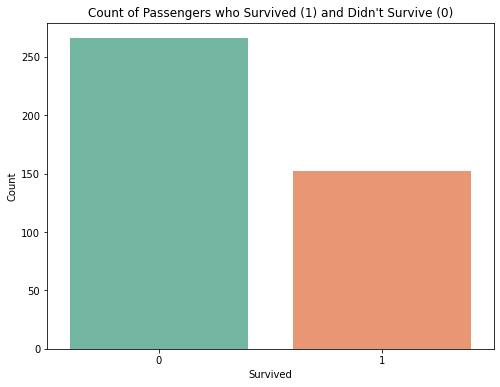

In [10]:

# Plotting the count of passengers who survived and didn't survive
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Survived', palette="Set2")
plt.title("Count of Passengers who Survived (1) and Didn't Survive (0)")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()



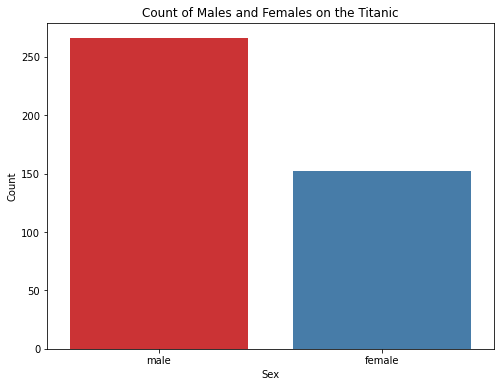

In [11]:
# Plotting the count of males and females on the Titanic
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Sex', palette="Set1")
plt.title("Count of Males and Females on the Titanic")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()



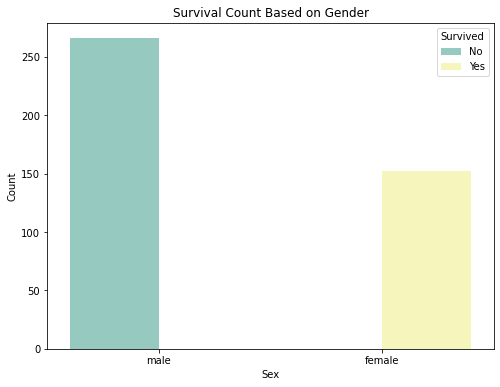

In [12]:
# Plotting the survival count based on gender
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Sex', hue='Survived', palette="Set3")
plt.title("Survival Count Based on Gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()



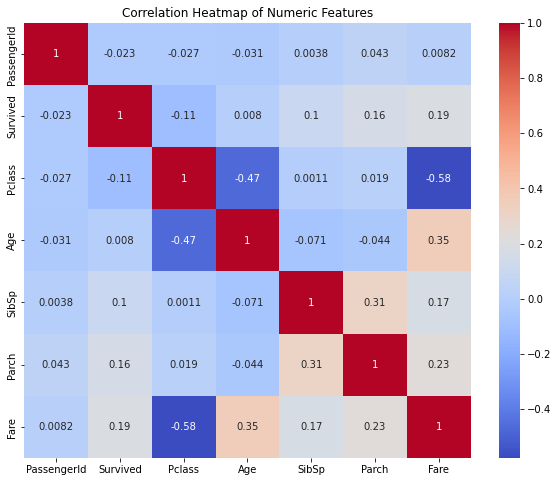

In [13]:
# Creating a heatmap to visualize the correlation between numeric features
plt.figure(figsize=(10, 8))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [14]:
#analyzing relation from each class to survival chance

In [15]:
#age distribution and survival

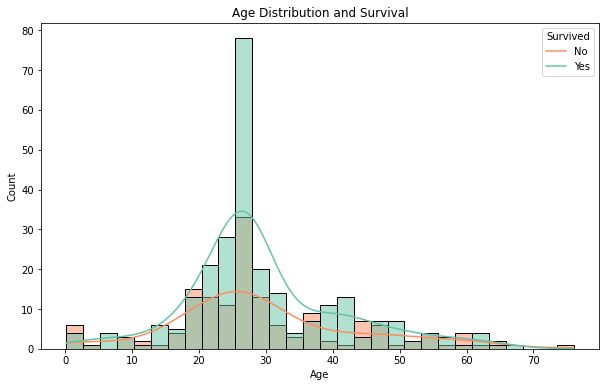

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Survived', bins=30, kde=True, palette="Set2")
plt.title("Age Distribution and Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


In [17]:
#class distribution and survival

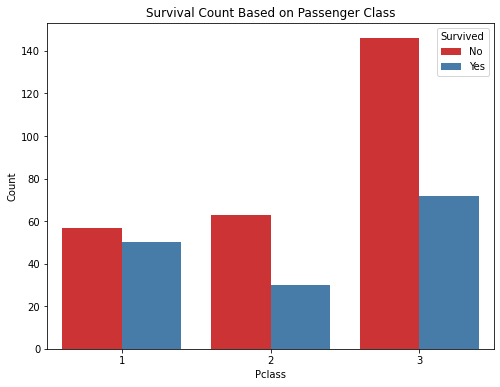

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Pclass', hue='Survived', palette="Set1")
plt.title("Survival Count Based on Passenger Class")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


In [19]:
#embarkd port and survival

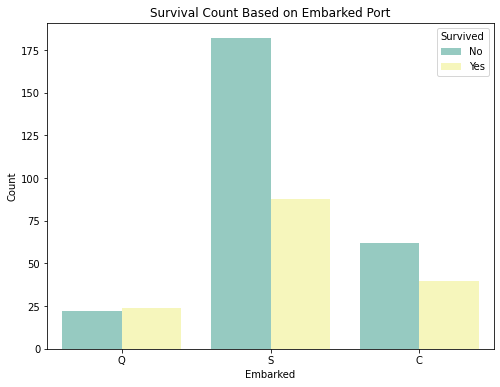

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Embarked', hue='Survived', palette="Set3")
plt.title("Survival Count Based on Embarked Port")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


In [21]:
#fare distibution and survival

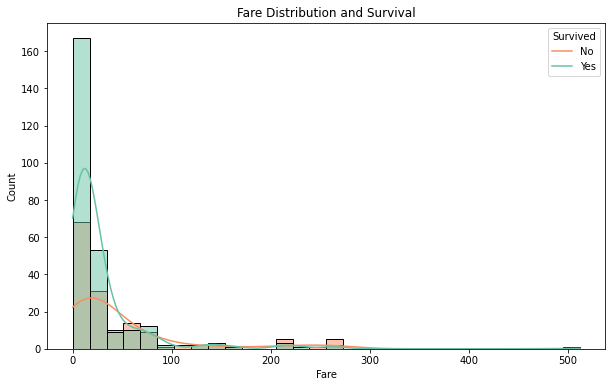

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Fare', hue='Survived', bins=30, kde=True, palette="Set2")
plt.title("Fare Distribution and Survival")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


In [23]:
#sibling/spouse and children/parents and survival

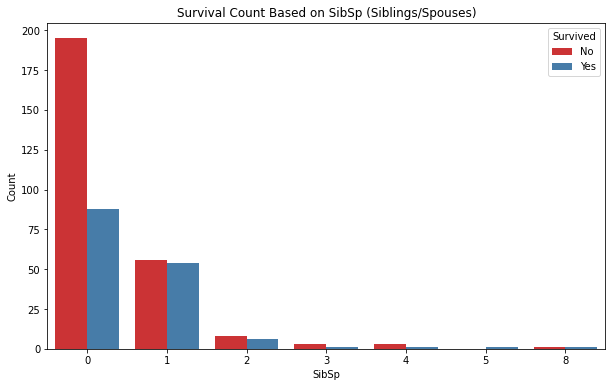

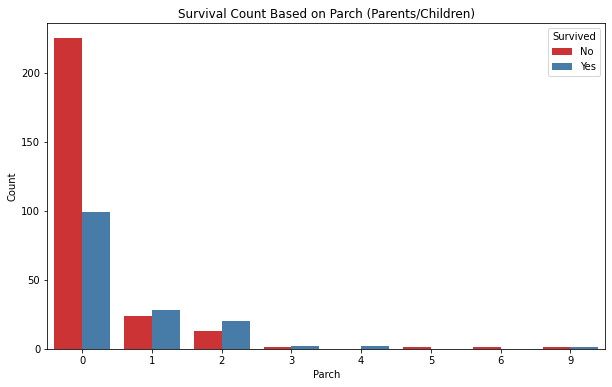

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='SibSp', hue='Survived', palette="Set1")
plt.title("Survival Count Based on SibSp (Siblings/Spouses)")
plt.xlabel("SibSp")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Parch', hue='Survived', palette="Set1")
plt.title("Survival Count Based on Parch (Parents/Children)")
plt.xlabel("Parch")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


### BUILDING THE MODEL

In [25]:
# Data Preprocessing
#note-cabin,name,passenger id,ticket no dont have any relation with survival so we are not considerring it
data.drop(["Cabin", "Name", "PassengerId", "Ticket"], axis=1, inplace=True)
X = data.drop("Survived", axis=1)
y = data["Survived"]
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,27.0,0,0,8.0500,S


In [26]:
# Splitting the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
#  preprocessing steps for numeric and categorical data
numeric_features = ["Age", "SibSp", "Parch", "Fare"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_features = ["Sex", "Embarked", "Pclass"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ])

###### CHECKING ACCUARACY WITH DIFFERENT MODELS

In [28]:
# Define a list of classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVC": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

In [29]:
# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    model = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", clf)
    ])
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Classifier: {clf_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(report)
    print("\n")


Classifier: Random Forest
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



Classifier: SVC
Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.97      0.99        34

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



Classifier: Logistic Regression
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   ma

### PREDICTION FOR RANDOM PASSENGER DATA

In [30]:
#predicting with a random passenger

# Define the passenger's data
passenger_data = pd.DataFrame({
    'Pclass': [1],
    'Sex': ['female'],
    'Age': [100],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [10],
    'Cabin': ['Unknown'],
    'Embarked': ['P']
})

# Defining the model (using the Gradient Boosting classifier)
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(n_estimators=100, random_state=42))
])

# Train the best model on the entire dataset
model.fit(X, y)
prediction = model.predict(passenger_data)

#prdeiction
answer="passenger survived" if prediction[0]==1 else "passenger not survived"
answer


'passenger survived'